# Assignment | Call Function

Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings

import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


2023-06-12 13:50:40.724379: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 13:50:40.796688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 13:50:40.798735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 13:50:41.925202: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version: 2.12.0
Keras version: 2.12.0


Q2. Load the Wine Quality dataset and explore its dimensions.

Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification



In [4]:
import pandas as pd

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Explore the dimensions of the dataset
rows, columns = wine_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)


Number of rows: 1599
Number of columns: 12


Q3. Check for null values, identify categorical variables, and encode them.


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Check for null values
null_counts = wine_data.isnull().sum()
print("Null value counts:")
print(null_counts)

Null value counts:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
# Identify categorical variables
categorical_vars = wine_data.select_dtypes(include=["object"]).columns
print("Categorical variables:")
print(categorical_vars)

Categorical variables:
Index(['quality'], dtype='object')


In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()
for var in categorical_vars:
    wine_data[var] = label_encoder.fit_transform(wine_data[var])
    
# Display the updated DataFrame
print("Encoded dataset:")
print(wine_data.head())


Encoded dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2  

Q4. Separate the features and target variables from the dataframe.

In [8]:
import pandas as pd

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Separate the features (X) and target (y) variables
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Display the features DataFrame
print("Features (X):")
print(X.head())

# Display the target variable Series
print("Target (y):")
print(y.head())


Features (X):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      

Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Separate the features (X) and target (y) variables
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)


Training data shape: (1023, 11)
Validation data shape: (256, 11)
Test data shape: (320, 11)


Q6. Perform scaling on the dataset.

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Separate the features (X) and target (y) variables
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Perform scaling on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
print("Scaled features:")
print(X_scaled_df.head())


Scaled features:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777

Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K

# Clear previous TensorFlow backend session
K.clear_session()

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Separate the features (X) and target (y) variables
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to binary categorical format
y_train_binary = pd.get_dummies(y_train)['good']

# Create the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_binary, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", accuracy)


Q8. Create a Sequential model and add all the layers to it.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Separate the features (X) and target (y) variables
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to binary categorical format
y_train_binary = pd.get_dummies(y_train)['good']

# Create the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_binary, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", accuracy)


Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Separate the features (X) and target (y) variables
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to binary categorical format
y_train_binary = pd.get_dummies(y_train)['good']

# Create the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model with the TensorBoard callback
model.fit(X_train_scaled, y_train_binary, epochs=10, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", accuracy)


Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
no improvement is observed.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Separate the features (X) and target (y) variables
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to binary categorical format
y_train_binary = pd.get_dummies(y_train)['good']

# Create the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create an EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with EarlyStopping callback
model.fit(X_train_scaled, y_train_binary, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping_callback])

# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", accuracy)


Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Specify the path to the downloaded CSV file
file_path = "path/to/winequality.csv"

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv(file_path)

# Separate the features (X) and target (y) variables
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to binary categorical format
y_train_binary = pd.get_dummies(y_train)['good']

# Create the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the model with ModelCheckpoint callback
model.fit(X_train_scaled, y_train_binary, epochs=100, batch_size=32, validation_split=0.2, callbacks=[checkpoint_callback])

# Load the best saved model
best_model = tf.keras.models.load_model('best_model.h5')

# Evaluate the best model on the test data
_, accuracy = best_model.evaluate(X_test_scaled, y_test)
print("Test accuracy of the best model:", accuracy)


Q12. Print the model summary.

In [15]:
# Create the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [16]:
# Create the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In this code, we set the loss parameter in the compile() method to 'binary_crossentropy', which is commonly used for binary classification tasks. We also specify the optimizer as 'adam', which is an efficient and popular optimization algorithm. Additionally, we include the metric 'accuracy' in the metrics parameter to monitor the accuracy of the model during training and evaluation.

By incorporating these changes, your model will be configured to use binary cross-entropy as the loss function, Adam optimizer, and track the accuracy metric.

Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint


# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv('wine.csv')

# Separate the features (X) and target (y) variables
X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to binary categorical format
y_train_binary = pd.get_dummies(y_train)['good']

# Clear TensorFlow session
tf.keras.backend.clear_session()

# Create the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Specify callbacks
tensorboard_callback = TensorBoard(log_dir='logs')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model with callbacks
model.fit(X_train_scaled, y_train_binary, epochs=100, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

# Load the best saved model
best_model = tf.keras.models.load_model('best_model.h5')

# Evaluate the best model on the test data
_, accuracy = best_model.evaluate(X_test_scaled, y_test)
print("Test accuracy of the best model:", accuracy)


Q16. Get the model's parameters.

In [19]:
# Get the model's parameters
model_params = model.get_weights()

# Print the parameters
for layer_num, layer_params in enumerate(model_params):
    print("Layer {}: {}".format(layer_num + 1, layer_params))


Layer 1: [[ 2.70830452e-01  2.80210981e-03  2.57138520e-01  2.86530852e-01
   2.69706678e-02 -1.04735434e-01  1.80048883e-01 -2.98677683e-01
   1.63223431e-01  1.86441123e-01  2.26321056e-01 -5.14586978e-02
   3.60332849e-03  2.04541951e-01  4.35646996e-02 -2.44622767e-01
  -1.45843446e-01  1.16956331e-01  1.29130110e-01  2.34154403e-01
  -1.83577344e-01 -4.40275185e-02  2.55786240e-01  1.30688757e-01
   2.09045246e-01 -4.47378680e-02  2.45459467e-01 -7.07765669e-02
   2.10565329e-01 -1.00928590e-01 -1.48921847e-01 -1.10066235e-01
  -1.22331060e-01 -1.12284765e-01 -1.43291116e-01 -4.57869433e-02
  -7.99675733e-02 -1.87120929e-01 -8.75180364e-02  3.84763107e-02
   1.00019813e-01 -1.99459389e-01 -1.25802070e-01  7.04445690e-02
  -6.93364739e-02 -2.35111505e-01 -1.38718545e-01  1.79290641e-02
  -1.96849406e-02 -7.95782283e-02 -2.10056286e-02  1.18407428e-01
  -1.92152932e-01  2.62281477e-01 -2.14818701e-01 -1.86007246e-01
  -1.47480145e-01  2.84011699e-02  1.75702855e-01 -2.71718055e-01
 

Q17. Store the model's training history as a Pandas DataFrame.

In [20]:
import pandas as pd

# Fit the model and store the history
history = model.fit(X_train_scaled, y_train_binary, epochs=100, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

# Create a DataFrame from the history
history_df = pd.DataFrame(history.history)

# Print the DataFrame
print(history_df.head())


Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4576 - accuracy: 0.7810 - val_loss: 0.4572 - val_accuracy: 0.7891
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4518 - accuracy: 0.7849 - val_loss: 0.4456 - val_accuracy: 0.7930
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.7859 - val_loss: 0.4467 - val_accuracy: 0.7930
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.7996 - val_loss: 0.4440 - val_accuracy: 0.8047
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.7947 - val_loss: 0.4601 - val_accuracy: 0.8008
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7977 - val_loss: 0.4515 - val_accuracy: 0.7930
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8074 - val_loss: 0.4518 - val_accuracy: 0.7852
Epoch 8/100
3

Q18. Plot the model's training history.

Epoch 1/100
30/32 [===========================>..] - ETA: 0s - loss: 0.4091 - accuracy: 0.8125

/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


32/32 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8123 - val_loss: 0.4594 - val_accuracy: 0.7852
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8094 - val_loss: 0.4669 - val_accuracy: 0.7773
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8192 - val_loss: 0.4705 - val_accuracy: 0.7852
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8231 - val_loss: 0.4583 - val_accuracy: 0.7891
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8152 - val_loss: 0.4642 - val_accuracy: 0.7891
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.8231 - val_loss: 0.4738 - val_accuracy: 0.7891
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8270 - val_loss: 0.4699 - val_accuracy: 0.7852
Epoch 8/100
32/32 [======

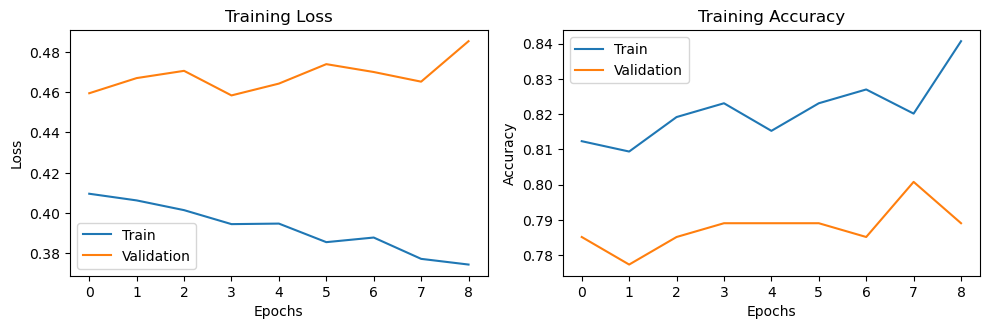

In [21]:
import matplotlib.pyplot as plt

# Fit the model and store the history
history = model.fit(X_train_scaled, y_train_binary, epochs=100, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

# Plot the training and validation metrics
plt.figure(figsize=(10, 6))

# Training loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Training accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Show the plot
plt.tight_layout()
plt.show()


Q19. Evaluate the model's performance using the test data.

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
